# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify 🎵 
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Dealing with Missing values                        | 
| Dealing with Duplicates                            | 
| Dealing Outliers if needed                             | 
| Feature selection                        | 
| Features encoding                              | 
| Target variable creation |                     
| Data types confirmation  
| Features Engineering  

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Notebook Setup & Data Import 
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
We load the data set and review the types of the variables as well as basic info.
</div>

In [2]:
import pandas as pd

df = pd.read_excel("Spotify_songs.xlsx")
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2001,It Wasn't Me,81,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0
1,2001,Survivor,73,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0
2,2001,Stan,84,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0
3,2001,Can't Get You out of My Head,80,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0
4,2001,Lady Marmalade - Single Edit,70,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
Below is the description for every column in Spotify dataset
</div>

| **Field Name**        | **Type**               | **Description / Meaning**                                                                                                                                                          |
| --------------------- | ---------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **year**              | Integer                | The year the track was released.                                                                                                                                                   |
| **track_name**        | Text                   | The name (title) of the song.                                                                                                                                                      |
| **track_popularity**  | Numeric (0–100)        | Spotify’s popularity index for the track, based on total plays, recency, and listener engagement. Higher = more popular. *(This will be our target variable for classification.)* |
| **album**             | Text                   | The name of the album where the track appears.                                                                                                                                     |
| **artist_name**       | Text                   | The performing artist’s or band’s name.                                                                                                                                            |
| **artist_genres**     | Text / List            | Genres associated with the artist (e.g., “pop”, “hip hop”, “dance pop”). Can include multiple genres separated by `;`.                                                             |
| **artist_popularity** | Numeric (0–100)        | Spotify’s popularity score for the artist, calculated similarly to track popularity but across all their songs.                                                                    |
| **danceability**      | Float (0–1)            | Measures how suitable a track is for dancing — based on tempo, rhythm stability, beat strength, and overall regularity. Higher = more danceable.                                   |
| **energy**            | Float (0–1)            | Intensity and activity of a track. High-energy songs feel fast, loud, and noisy. Low values indicate calm or quiet tracks.                                                         |
| **key**               | Numeric (0–11)         | The key (pitch class) of the song (e.g., 0 = C, 1 = C♯/D♭, 2 = D, etc.).                                                                                                           |
| **loudness**          | Float (in dB)          | Overall loudness of a track (average decibels). Typically ranges from –60 (very quiet) to 0 (very loud).                                                                           |
| **mode**              | Binary (0 or 1)        | Indicates modality: 1 = Major, 0 = Minor. Major keys sound happy, minor keys sound sad or dark.                                                                                    |
| **speechiness**       | Float (0–1)            | Detects presence of spoken words in a track. Higher = more speech-like (e.g., talk shows, rap).                                                                                    |
| **acousticness**      | Float (0–1)            | Probability that the track is acoustic. Higher = more acoustic (fewer electronic instruments).                                                                                     |
| **instrumentalness**  | Float (0–1)            | Likelihood that the track has no vocals. Values near 1 suggest purely instrumental music.                                                                                          |
| **liveness**          | Float (0–1)            | Detects the presence of a live audience. Higher values suggest the recording is live.                                                                                              |
| **valence**           | Float (0–1)            | Musical “positiveness” — high values sound cheerful/happy, low values sound sad/angry.                                                                                             |
| **tempo**             | Float (BPM)            | The overall estimated beats per minute (tempo) of the track. Higher = faster.                                                                                                      |
| **duration_ms**       | Numeric (milliseconds) | The total duration of the track in milliseconds. seconds.                                                                                                       |


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. General Review of the Dataset
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Bellow is shown the Dataframe infromation
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2200 non-null   int64  
 1   track_name         2200 non-null   object 
 2   track_popularity   2200 non-null   int64  
 3   album              2200 non-null   object 
 4   artist_name        2200 non-null   object 
 5   artist_genres      2200 non-null   object 
 6   artist_popularity  2200 non-null   int64  
 7   danceability       2199 non-null   float64
 8   energy             2199 non-null   float64
 9   key                2199 non-null   float64
 10  loudness           2199 non-null   float64
 11  mode               2199 non-null   float64
 12  speechiness        2199 non-null   float64
 13  acousticness       2199 non-null   float64
 14  instrumentalness   2199 non-null   float64
 15  liveness           2199 non-null   float64
 16  valence            2199 

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Some null values have been detected in some featured, the asusmption is that they all belong to the same entry. This will be checked better. 
    Moreover, the following cell plots the dataframe features to understand the distribution and assess if there is any furher action needed. 

</div>

<Figure size 1800x1400 with 0 Axes>

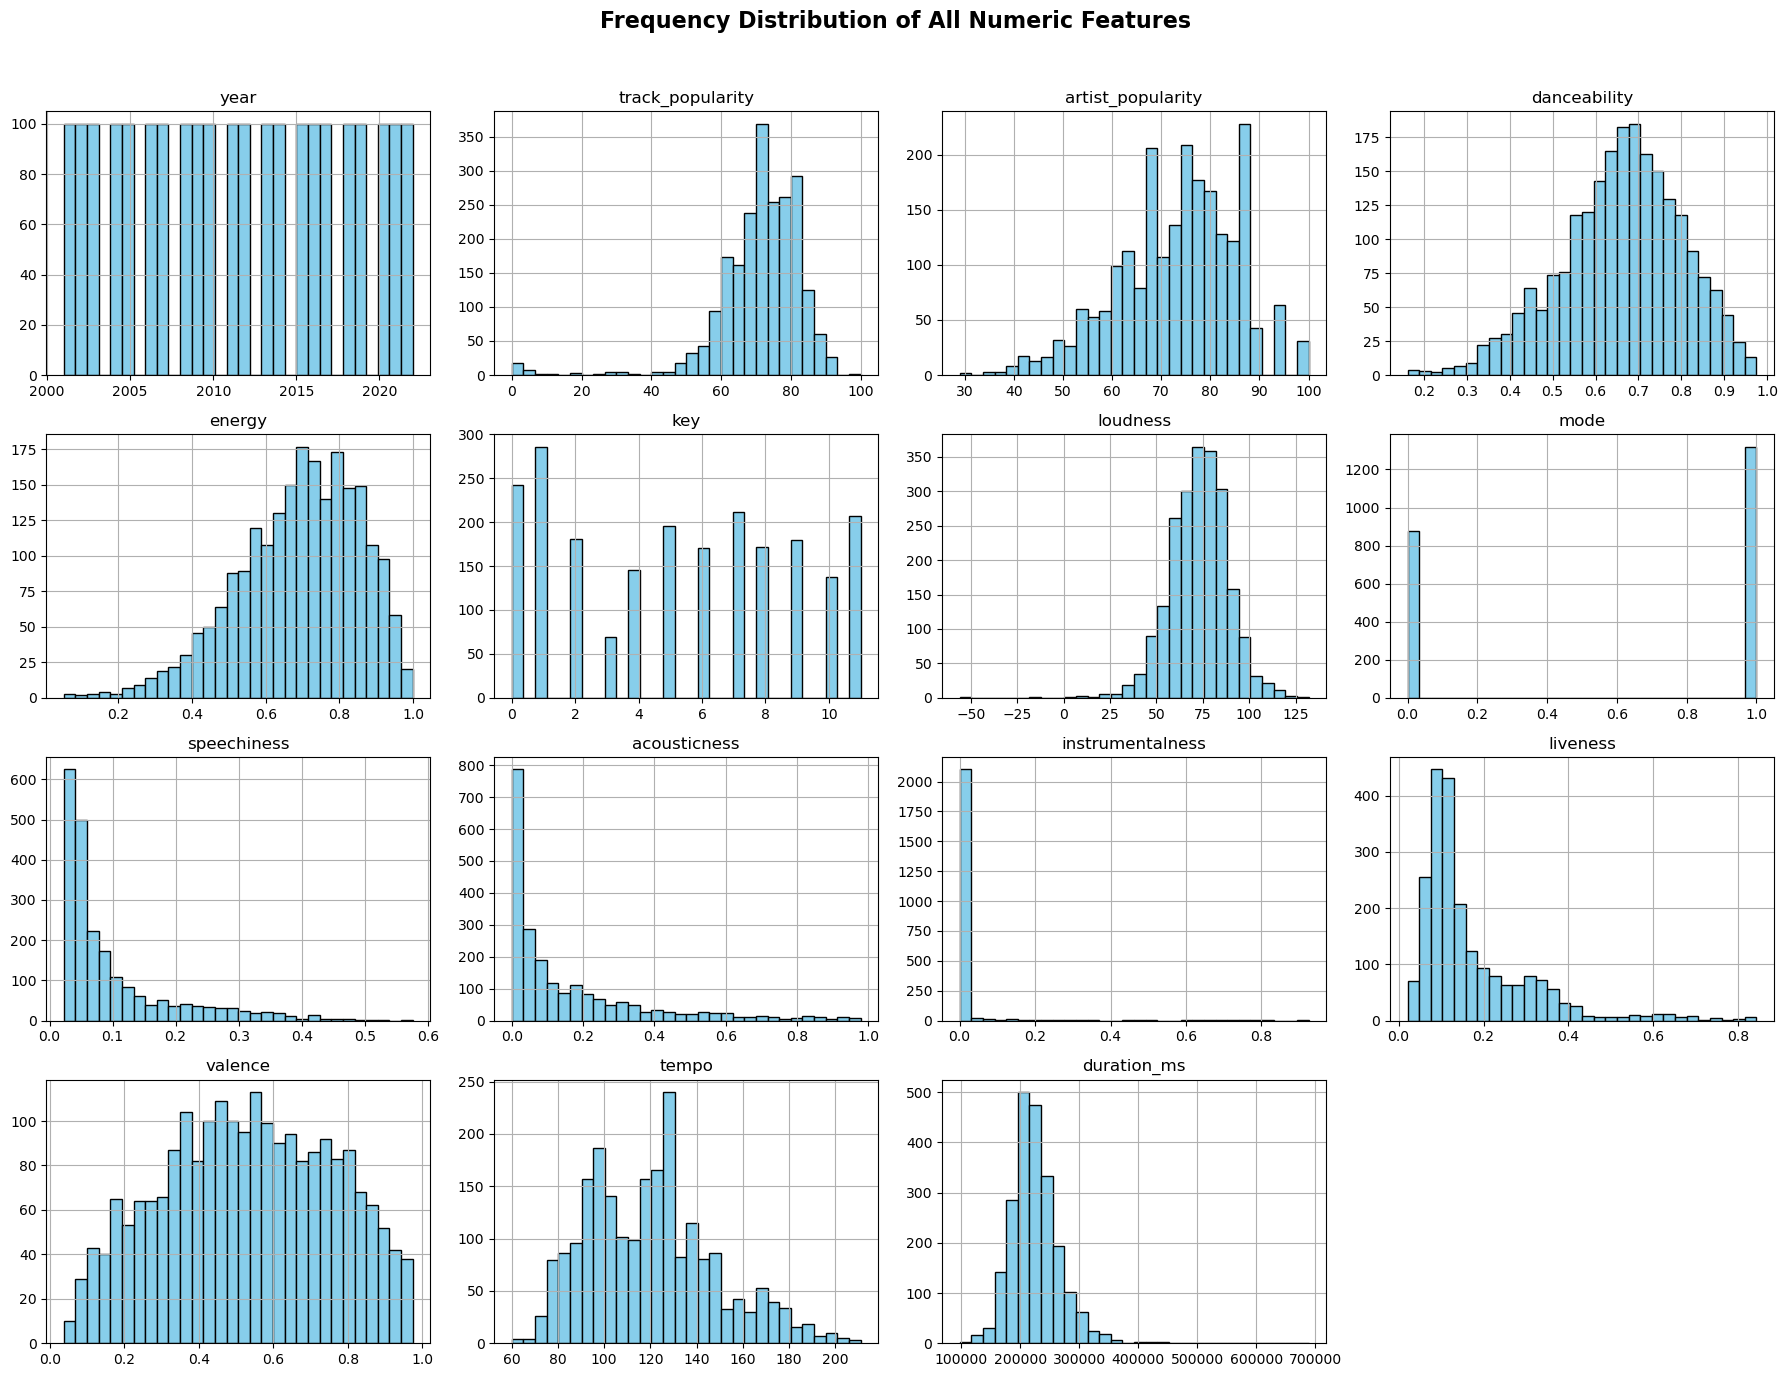

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Plot histograms for all numeric columns
plt.figure(figsize=(18, 14))
df[numeric_cols].hist(bins=30, figsize=(18, 14), color="skyblue", edgecolor="black")
plt.suptitle(
    "Frequency Distribution of All Numeric Features", fontsize=16, fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Based on the project goal,to build a classification model that tries to predict the future success (in popularity) of the songs, the target variable will be track_popularity, and a discrete version of this variable will be creating. 
</div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. Duplicate Analysis
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    The following cell checks for any duplicate rows, first assuming all columns have the same values. 
</div>

In [5]:
# Count duplicate rows across all columns
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the first few duplicates (if any)
df[df.duplicated()].head()

Number of duplicate rows: 0


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Now, a second analysis will be considered where the duplicated are based on the sonf name as well as artist name.
</div>

In [6]:
# Check duplicates based only on song identity
dup_songs = df[df.duplicated(subset=["track_name", "artist_name"], keep=False)]

print(f"Number of duplicate songs by (track_name, artist_name): {dup_songs.shape[0]}")
dup_songs.head()

Number of duplicate songs by (track_name, artist_name): 227


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
23,2001,Your Body Is a Wonderland,76,Room For Squares,John Mayer,['neo mellow'; 'singer-songwriter'],75,0.647,0.729,5.0,79.0,1.0,0.0236,0.0206,0.0489,0.1340,0.687,94.010,249627.0
117,2002,Clocks,84,A Rush of Blood to the Head,Coldplay,['permanent wave'; 'pop'],86,0.577,0.749,5.0,85.0,0.0,0.0279,0.5990,0.0115,0.1830,0.255,130.970,307880.0
121,2002,"I Know What You Want (feat, Flipmode Squad)",73,"It Ain't Safe No More, , ,",Busta Rhymes,['east coast hip hop'; 'hardcore hip hop'; 'hi...,70,0.648,0.759,6.0,63.0,1.0,0.3060,0.0142,0.0000,0.6480,0.518,85.996,324307.0
125,2002,Work It,72,Under Construction,Missy Elliott,['dance pop'; 'hip hop'; 'hip pop'; 'neo soul'...,69,0.884,0.677,1.0,74.0,1.0,0.2830,0.0778,0.0000,0.0732,0.584,101.868,263227.0
191,2002,If You're Not The One,54,Gotta Get Thru This,Daniel Bedingfield,['europop'; 'talent show'],51,0.687,0.537,10.0,88.0,1.0,0.0305,0.5610,0.0000,0.1070,0.264,120.023,257160.0


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Out of this second analysis, 277 duplicate records have been identified, so there needs to be an assesement of which features are different for these identified duplicates and validate them . 
</div>

In [7]:
import numpy as np
import pandas as pd

diff_beyond_year = []

# Group by song and artist
for (song, artist), subset in df.groupby(["track_name", "artist_name"]):
    if len(subset) > 1:
        subset_clean = subset.copy()

        # Normalize text
        for col in subset_clean.select_dtypes(include="object").columns:
            subset_clean[col] = subset_clean[col].astype(str).str.strip().str.lower()

        # Normalize numeric values: round to avoid float precision noise
        for col in subset_clean.select_dtypes(include=np.number).columns:
            subset_clean[col] = subset_clean[col].round(5)

        # Identify columns with differences
        diff_cols = [
            col for col in subset_clean.columns if subset_clean[col].nunique() > 1
        ]

        # Ignore 'year' as the only differing feature
        diff_cols_beyond_year = [col for col in diff_cols if col != "year"]

        if len(diff_cols_beyond_year) > 0:
            diff_beyond_year.append(
                {
                    "track_name": song,
                    "artist_name": artist,
                    "num_duplicates": subset.shape[0],
                    "different_features": diff_cols_beyond_year,
                }
            )

# Convert to DataFrame
diff_beyond_year_df = pd.DataFrame(diff_beyond_year)
diff_beyond_year_df = diff_beyond_year_df.sort_values(
    by="num_duplicates", ascending=False
).reset_index(drop=True)

print(
    f"Number of duplicated songs with true differences beyond 'year': {diff_beyond_year_df.shape[0]}"
)
display(diff_beyond_year_df)

Number of duplicated songs with true differences beyond 'year': 21


,track_name,artist_name,num_duplicates,different_features
0,Bad Blood,Taylor Swift,2,"[track_popularity, album, danceability, energy..."
1,"Mood (feat, iann dior)",24kGoldn,2,"[track_popularity, album, danceability, energy..."
2,good 4 u,Olivia Rodrigo,2,"[track_popularity, album, danceability, energy..."
3,What You Know Bout Love,Pop Smoke,2,"[track_popularity, album, danceability, energy..."
4,The Heart Wants What It Wants,Selena Gomez,2,"[track_popularity, album, duration_ms]"
5,Style,Taylor Swift,2,"[track_popularity, album, danceability, energy..."
6,Shivers,Ed Sheeran,2,"[track_popularity, album]"
7,STAY (with Justin Bieber),The Kid LAROI,2,"[track_popularity, album]"
8,"Post to Be (feat, Chris Brown & Jhene Aiko)",Omarion,2,"[track_popularity, album]"
9,"No Hands (feat, Roscoe Dash & Wale)",Waka Flocka Flame,2,"[track_popularity, album]"


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Furthermore, continuing with the duplicates analysis, the next asssesment is on features values that are the same except for the popularity which is due to a different song release. 
</div>

In [8]:
# Filter all duplicate records for "Shivers" by Ed Sheeran
song_name = "Blinding Lights"
artist_name = "The Weeknd"

shivers_records = df[
    (df["track_name"] == song_name) & (df["artist_name"] == artist_name)
]

# Display all records for this song
print(f"All records for '{song_name}' by {artist_name}:")
display(shivers_records)

All records for 'Blinding Lights' by The Weeknd:


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1900,2020,Blinding Lights,19,Blinding Lights,The Weeknd,['canadian contemporary r&b'; 'canadian pop'; ...,94,0.513,0.796,1.0,61.0,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573.0
2062,2021,Blinding Lights,92,After Hours,The Weeknd,['canadian contemporary r&b'; 'canadian pop'; ...,94,0.514,0.730,1.0,77.0,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Furthermore, continuing with the duplicates analysis, the next asssements is on features vlues that are the same except for the popularity which is due to a different song release. 
</div>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
We will delete duplicates that fullfil the below criteria and keep only one record for each:

    1- if all features' values are the same except the year
    2-if they have missing / nulls in the features 
    3-if there is a new release, keep the record with highest popularity if all other features are the same
    4-if there is a new release and all the other features are different then keep them both
</div>

| Rule  | Condition                                   | Action                      |
| ----- | ------------------------------------------- | --------------------------- |
| **1** | All features identical except `year`        | Keep **latest year**        |
| **2** | Any rows with missing/null values           | Keep **only complete rows** |
| **3** | All features same except `track_popularity` | Keep **highest popularity** |
| **4** | Different features and different years      | Keep **all versions**       |


In [9]:
import pandas as pd
import numpy as np


# Group by song and artist to analyze duplicates
def clean_duplicates(df):
    cleaned_records = []

    for (song, artist), group in df.groupby(["track_name", "artist_name"]):
        # If only one record -> keep as is
        if len(group) == 1:
            cleaned_records.append(group.iloc[0])
            continue

        # Columns with variation within duplicates
        diff_cols = [col for col in df.columns if group[col].nunique(dropna=False) > 1]

        # Case 1️: If only 'year' differs
        if diff_cols == ["year"]:
            cleaned_records.append(group.iloc[0])  # Keep first one
            continue

        # Case 2️: If some have missing/nulls — keep the most complete one
        group["num_missing"] = group.isnull().sum(axis=1)
        group = group.sort_values("num_missing", ascending=True)

        # Case 3️: From remaining, keep the one with highest popularity
        best_row = group.sort_values("track_popularity", ascending=False).iloc[0]
        cleaned_records.append(best_row)

    # Combine all chosen rows
    cleaned_df = (
        pd.DataFrame(cleaned_records)
        .drop(columns=["num_missing"], errors="ignore")
        .reset_index(drop=True)
    )
    return cleaned_df


# Apply the cleaning function
df_cleaned = clean_duplicates(df)

# Check results
print("Original shape:", df.shape)
print("After cleaning:", df_cleaned.shape)

# Verify no duplicate song-artist pairs remain
duplicates_remaining = df_cleaned.duplicated(subset=["track_name", "artist_name"]).sum()
print("Remaining duplicates:", duplicates_remaining)

Original shape: (2200, 19)
After cleaning: (2086, 19)
Remaining duplicates: 0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. Missing Values
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    In the below section we check for missing and null values in the features. 
</div>

In [10]:
# Summary of missing values
missing_summary = (
    df.isnull()
    .sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_count"})
)

# Add percentage of missing values
missing_summary["missing_percent"] = (
    missing_summary["missing_count"] / len(df_cleaned)
) * 100

# Filter only columns that have missing values
missing_summary = missing_summary[missing_summary["missing_count"] > 0]

# Sort by percentage descending
missing_summary = missing_summary.sort_values(by="missing_percent", ascending=False)

print("Missing Value Summary:")
display(missing_summary)

Missing Value Summary:


,column,missing_count,missing_percent
7,danceability,1,0.047939
8,energy,1,0.047939
9,key,1,0.047939
10,loudness,1,0.047939
11,mode,1,0.047939
12,speechiness,1,0.047939
13,acousticness,1,0.047939
14,instrumentalness,1,0.047939
15,liveness,1,0.047939
16,valence,1,0.047939


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    It seems they all belong to the same record, so the action will be to drop it.

</div>

In [11]:
# Work on the cleaned dataset
df_final = df_cleaned.copy()

# Define numeric columns with missing values
numeric_cols = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

# Drop rows that have missing values in any of these columns
before_rows = len(df_final)
df_final = df_final.dropna(subset=numeric_cols)
after_rows = len(df_final)

# Confirm deletion worked
print(f"Dropped {before_rows - after_rows} rows with missing numeric values.")
print(f"Remaining rows: {after_rows}")
print(
    f"Remaining missing values in numeric columns: {df_final[numeric_cols].isnull().sum().sum()}"
)

Dropped 1 rows with missing numeric values.
Remaining rows: 2085
Remaining missing values in numeric columns: 0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Checking Feature data types & Correlation
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Checking all features data types and make sure they are aligned with the feature values

</div>

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2085
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2085 non-null   int64  
 1   track_name         2085 non-null   object 
 2   track_popularity   2085 non-null   int64  
 3   album              2085 non-null   object 
 4   artist_name        2085 non-null   object 
 5   artist_genres      2085 non-null   object 
 6   artist_popularity  2085 non-null   int64  
 7   danceability       2085 non-null   float64
 8   energy             2085 non-null   float64
 9   key                2085 non-null   float64
 10  loudness           2085 non-null   float64
 11  mode               2085 non-null   float64
 12  speechiness        2085 non-null   float64
 13  acousticness       2085 non-null   float64
 14  instrumentalness   2085 non-null   float64
 15  liveness           2085 non-null   float64
 16  valence            2085 non-n

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Below  correlation map can be found, which does not show a specific strong correltion between varibles, so Dimension Reduction will not be executed.
</div>

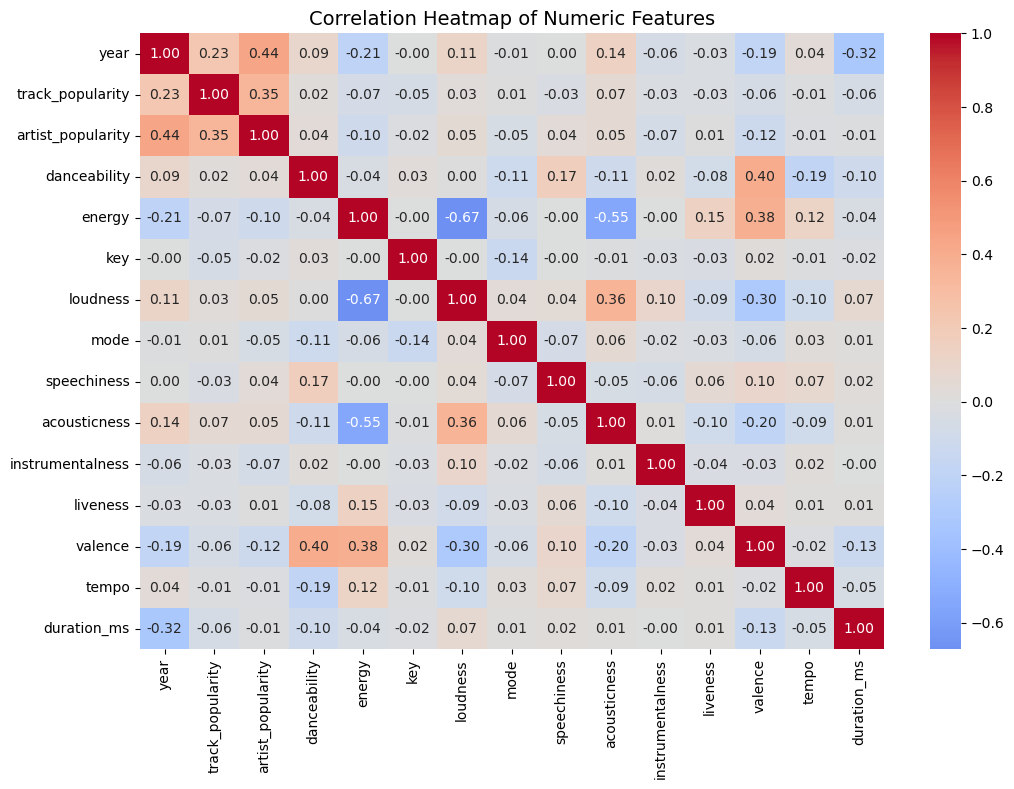

In [13]:
# Summary statistics
df_final.describe().T

# Correlation matrix
corr = df_final.select_dtypes(include=["float64", "int64"]).corr()

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
There is strong correlation between energy ↔ loudness (-0.67) and between energy ↔ acousticness (0.55)

Loudness values are positive except 2 values where usually the DB values should be negative. This is why we decided to unify all values to be negative. Once we make the loudness values negative the correlation with Energy will start to be positive

The models: Decition Tree, Random Forest and Boosting they can deal with multicolinearity. So no action is needed for these models.

We see that the target variable track_popularity is weakly correlated with most of the features which may seem as bad news but there could be non linear relationship that can be captured by the different models
</div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
6. Outlier Analysis
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
    Below an analysis of outliers will be done, the decision is to not take any action as models like DT, RF and Boosting can deal with it properly.
</div>

In [14]:
import pandas as pd

# Select only numeric features
numeric_cols = df_final.select_dtypes(include=["number"]).columns

outlier_summary = []

for col in numeric_cols:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((df_final[col] < lower_bound) | (df_final[col] > upper_bound)).sum()
    outlier_percent = 100 * outliers / len(df_final)

    outlier_summary.append(
        {
            "feature": col,
            "outlier_count": outliers,
            "outlier_percent": round(outlier_percent, 2),
        }
    )

outlier_df = pd.DataFrame(outlier_summary).sort_values(
    by="outlier_percent", ascending=False
)
display(outlier_df)

,feature,outlier_count,outlier_percent
10,instrumentalness,431,20.67
8,speechiness,226,10.84
9,acousticness,174,8.35
11,liveness,112,5.37
14,duration_ms,72,3.45
1,track_popularity,43,2.06
6,loudness,32,1.53
3,danceability,20,0.96
4,energy,20,0.96
13,tempo,17,0.82


| Feature            | Outlier % | Notes                                                                        |
| ------------------ | --------- | ---------------------------------------------------------------------------- |
| `instrumentalness` | 20.7%     | Very high — might be natural, as many songs have 0 vs. high values (bimodal) |
| `speechiness`      | 10.9%     | Moderate — “talky” tracks (e.g., rap) may naturally spike                    |
| `acousticness`     | 8.3%      | Acceptable — normal variation across genres                                  |
| `liveness`         | 5.4%      | Slightly high — live recordings behave differently                           |
| Others             | < 3%      | Perfectly fine — no need to adjust                                           |


In [15]:
skewness = df_final[numeric_cols].skew().sort_values(ascending=False)
display(skewness)

instrumentalness     8.056224
liveness             2.006786
speechiness          1.879697
acousticness         1.837176
duration_ms          1.748579
tempo                0.556273
key                  0.028526
year                 0.021956
valence             -0.062407
danceability        -0.397075
mode                -0.402425
artist_popularity   -0.440275
loudness            -0.492929
energy              -0.644309
track_popularity    -2.331523
dtype: float64

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
7. Feature Engineering
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
   The sign for Loudness will be reversed so it reflects properly DB values
</div>

In [16]:
df["loudness"] = -df["loudness"].abs()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
   The artist name will be encoded to help predict popularity.
</div>

In [17]:
from sklearn.preprocessing import LabelEncoder

# Clean the artist_name column & Convert all to string and fill missing values
df_final["artist_name"] = df_final["artist_name"].fillna("unknown").astype(str)

# Initialize and apply encoder
artist_encoder = LabelEncoder()
df_final["artist_name_encoded"] = artist_encoder.fit_transform(df_final["artist_name"])


# Print confirmation and sample mapping
print("Artist names encoded successfully!")
print(f"Number of unique artists: {len(artist_encoder.classes_)}")

print("\nExample mapping (first 10):")
for i, name in enumerate(artist_encoder.classes_[:10]):
    print(f"{name} → {i}")

Artist names encoded successfully!
Number of unique artists: 846

Example mapping (first 10):
*NSYNC → 0
112 → 1
2 Chainz → 2
21 Savage → 3
24kGoldn → 4
2Pac → 5
3 Doors Down → 6
3LW → 7
3OH!3 → 8
5 Seconds of Summer → 9


In [18]:
df_final

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist_name_encoded
0,2005,True,63,"Take It All Away (U,S, Version)",Ryan Cabrera,['idol'; 'neo mellow'],43,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,0.1510,0.3690,96.938,203546.0,655
1,2007,1973,72,All the Lost Souls,James Blunt,['neo mellow'; 'pop rock'],69,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,0.0789,0.7680,123.007,280027.0,338
2,2014,#SELFIE,65,#SELFIE,The Chainsmokers,['electropop'; 'pop'],78,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,0.0770,0.6580,127.956,183750.0,732
3,2013,#thatPOWER,68,#willpower (Deluxe),"will,i,am",['dance pop'; 'pop'],71,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,0.0748,0.4020,127.999,279507.0,845
4,2017,",,,Ready For It?",85,reputation,Taylor Swift,['pop'],100,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,0.1970,0.4170,160.015,208187.0,726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2021,traitor,88,SOUR,Olivia Rodrigo,['pop'],85,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0,574
2082,2018,we fell in love in october,86,we fell in love in october / October Passed Me By,girl in red,['bedroom pop'; 'indie pop'; 'norwegian indie'...,72,0.566,0.366,7.0,110.0,1.0,0.0280,0.11300,0.181000,0.1550,0.2370,129.960,184154.0,841
2083,2019,when the party's over,85,WHEN WE ALL FALL ASLEEP; WHERE DO WE GO?,Billie Eilish,['art pop'; 'electropop'; 'pop'],88,0.367,0.111,4.0,114.0,1.0,0.0972,0.97800,0.000040,0.0897,0.1980,82.642,196077.0,90
2084,2021,willow,82,evermore,Taylor Swift,['pop'],100,0.392,0.574,7.0,96.0,1.0,0.1700,0.83300,0.001790,0.1450,0.5290,81.112,214707.0,726


In [19]:
df_final["artist_genres"]

0                                  ['idol'; 'neo mellow']
1                              ['neo mellow'; 'pop rock']
2                                   ['electropop'; 'pop']
3                                    ['dance pop'; 'pop']
4                                                 ['pop']
                              ...                        
2081                                              ['pop']
2082    ['bedroom pop'; 'indie pop'; 'norwegian indie'...
2083                     ['art pop'; 'electropop'; 'pop']
2084                                              ['pop']
2085                                     ['alt z'; 'pop']
Name: artist_genres, Length: 2085, dtype: object

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

 We will be using only the parent genre as it strongly reduces overfitting because it simplifies our feature space, removes noise from rare categories,and forces the model to learn patterns that generalize better.
    
We always need to remember that we will be using models like DT, RF and Boosting which will struggle with overfitting if we use all the generes

We will be using Label Encoding since it can work with models like DTn RF and Boosting.
</div>

Number of unique main genres: 36
Top 10 genres:
 main_genre
dance pop            390
pop                  235
atl hip hop           82
alternative metal     63
canadian pop          48
boy band              44
edm                   41
neo mellow            37
pop rap               37
art pop               36
Name: count, dtype: int64


C:\Users\abush\AppData\Local\Temp\ipykernel_19864\157476169.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


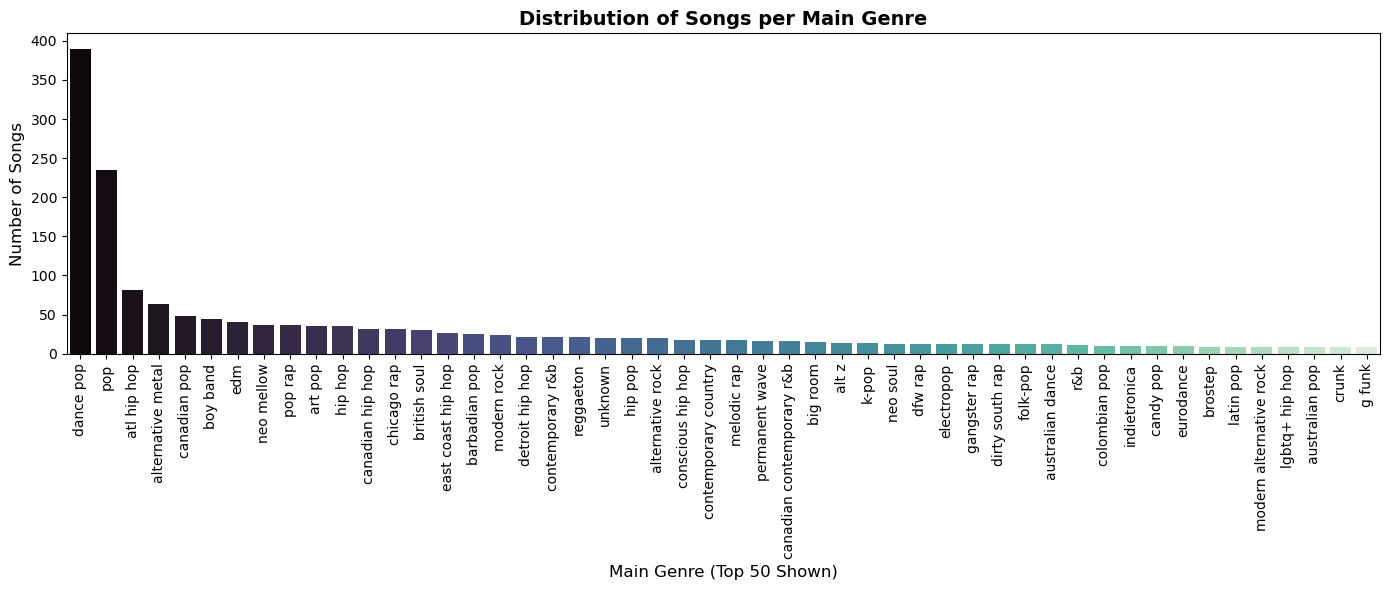

Genres encoded with LabelEncoder and original column dropped successfully.
Number of unique encoded genres: 223


In [20]:
import ast
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# --- Extract the first (main) genre safely ---
def extract_main_genre(x):
    """Safely parse genre strings and return only the first genre."""
    if isinstance(x, str):
        try:
            genres = ast.literal_eval(x.replace(";", ","))
            if isinstance(genres, list) and len(genres) > 0:
                return genres[0].strip().lower()  # only first genre
        except Exception:
            pass
    return "unknown"


# Apply extraction
df_final["main_genre"] = df_final["artist_genres"].apply(extract_main_genre)

# --- Count and display genre distribution ---
genre_counts = df_final["main_genre"].value_counts()

print(f"Number of unique main genres: {genre_counts.nunique()}")
print("Top 10 genres:\n", genre_counts.head(10))

# --- Plot the distribution ---
plt.figure(figsize=(14, 6))
sns.barplot(
    x=genre_counts.index[:50],  # show top 50 genres for clarity
    y=genre_counts.values[:50],
    palette="mako",
)
plt.title("Distribution of Songs per Main Genre", fontsize=14, fontweight="bold")
plt.xlabel("Main Genre (Top 50 Shown)", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Encode main genre using LabelEncoder ---
le = LabelEncoder()
df_final["main_genre_encoded"] = le.fit_transform(df_final["main_genre"])

# --- Drop the original genre column ---
# df_final.drop(columns=['artist_genres', 'main_genre'], inplace=True)

print("Genres encoded with LabelEncoder and original column dropped successfully.")
print(f"Number of unique encoded genres: {len(le.classes_)}")

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

Below the distribution of the target variable will be displayed to decide the best possible binning. 
</div>

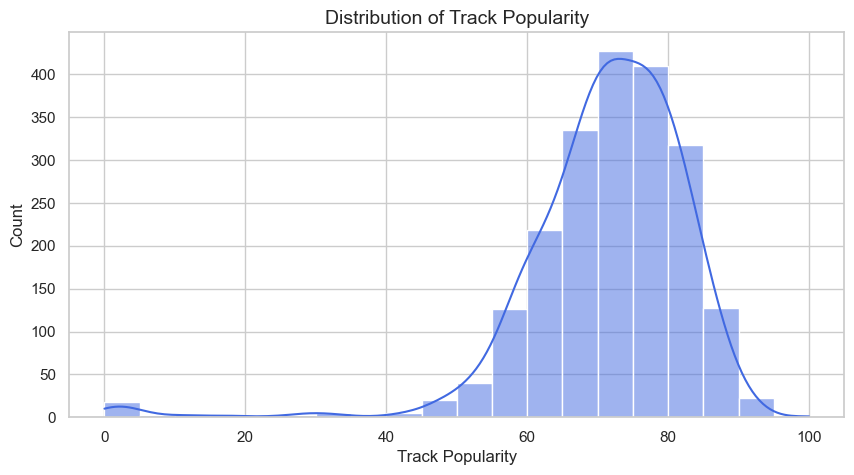

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid", palette="muted")

# --- Distribution of numeric popularity values ---
plt.figure(figsize=(10, 5))
sns.histplot(df_final["track_popularity"], bins=20, kde=True, color="royalblue")
plt.title("Distribution of Track Popularity", fontsize=14)
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

Since the target variable is skewed to the right, we will use the normal bins cut and we will deal with balancing in the DT algorithm to avoid bias. We did not use the quantile cut since we wanted to still keep the explainability in terms of popularity. We will generate later on synthetic data to compensate for the imbalanced classes

</div>



| Range  | Class  | Interpretation                                    |
| ------ | ------ | ------------------------------------------------- |
| 0–40   | Low    | Unpopular or niche songs                          |
| 40–65  | Medium | Moderately popular (regional hits, solid listens) |
| 65–100 | High   | Very popular / viral / top-chart songs            |


In [22]:
import pandas as pd

# Define fixed bins for Spotify track popularity
bins = [0, 40, 65, 100]
labels = ["Low", "Medium", "High"]

# Apply pd.cut() to create categorical popularity classes
df_final["popularity_class"] = pd.cut(
    df_final["track_popularity"], bins=bins, labels=labels, include_lowest=True
)

# Show class distribution
print("Popularity Class Distribution:")
print(df_final["popularity_class"].value_counts().sort_index())

Popularity Class Distribution:
popularity_class
Low         35
Medium     463
High      1587
Name: count, dtype: int64


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

Below the plotting of the class distribution
</div>

C:\Users\abush\AppData\Local\Temp\ipykernel_19864\898235716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="popularity_class", data=df_final, palette="viridis")


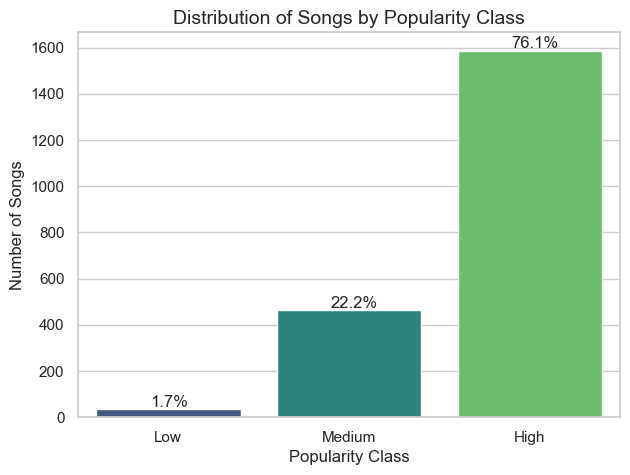

popularity_class
High      76.115108
Medium    22.206235
Low        1.678657
Name: proportion, dtype: float64


In [23]:
plt.figure(figsize=(7, 5))
sns.countplot(x="popularity_class", data=df_final, palette="viridis")
plt.title("Distribution of Songs by Popularity Class", fontsize=14)
plt.xlabel("Popularity Class")
plt.ylabel("Number of Songs")

# Annotate percentages on top of bars
total = len(df_final)
for p in plt.gca().patches:
    count = int(p.get_height())
    percent = 100 * count / total
    plt.gca().annotate(f"{percent:.1f}%", (p.get_x() + 0.3, p.get_height() + 10))

plt.show()

print(df_final["popularity_class"].value_counts(normalize=True) * 100)

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

 The below features which will improve the predictivity of the model
</div>

| **Feature Name**        | **How It’s Computed**                 | **Purpose / Intuition**                                           | **Why It Helps the Model**                                                                                      |
| ----------------------- | ------------------------------------- | ----------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| `energy_per_tempo`      | `energy / (tempo + 1e-6)`             | Measures how energetic a song is *relative to its speed (tempo)*. | Differentiates between **fast but calm** vs **fast and intense** tracks — captures rhythm intensity balance.    |
| `dance_energy_ratio`    | `danceability / (energy + 1e-6)`      | Compares *how danceable* a track is compared to its energy.       | Helps identify **low-energy yet highly danceable** versus high-energy club music. |
| `valence_energy`        | `valence * energy`                    | Interaction between *positivity* and *intensity*.                 | Captures emotional + energetic mood — **happy + energetic** songs tend to be more popular.                      |
| `duration_min`          | `duration_ms / 60000`                 | Converts duration from milliseconds to minutes.                   | Easier to interpret and compare; very short or long tracks might correlate differently with popularity.         |
| `instrumentalness_log`  | `log(1 + instrumentalness)`           | Log-transformed to reduce skewness.                               | Prevents long-tail instrumental values (many near 0, few near 1) from biasing splits.                           |
| `acousticness_log`      | `log(1 + acousticness)`               | Log-transformed version of acousticness.                          | Makes distribution more Gaussian — improves model’s ability to find thresholds.                                 |
| `speechiness_log`       | `log(1 + speechiness)`                | Log-transformed version of speechiness.                           | Smooths extreme values (e.g., rap tracks) while retaining variation.                                            |
| `artist_song_count`     | `# of songs per artist`               | Measures artist’s presence in dataset.                            | Popular artists with more releases usually have more consistent audience traction.                              |
| `artist_avg_popularity` | Mean of `track_popularity` per artist | Reflects overall brand/popularity of artist.                      | Captures **artist influence** — major driver of track success.                                                  |
| `decade`                | `(year // 10) * 10`                   | Groups years by decade.                                           | Allows the model to learn **music trends** over time 010s).                                    |
| `is_modern`             | `1 if year >= 2015 else 0`            | Binary modern-vs-old feature.                                     | Popularity patterns differ for older songs (streaming era vs CD era). Helps separate trends.                    |


In [24]:
import numpy as np

# Derived metrics
df_final["energy_per_tempo"] = df_final["energy"] / (df_final["tempo"] + 1e-6)
df_final["dance_energy_ratio"] = df_final["danceability"] / (df_final["energy"] + 1e-6)
df_final["valence_energy"] = df_final["valence"] * df_final["energy"]
df_final["duration_min"] = df_final["duration_ms"] / 60000

# Log transforms for skewed fields
for col in ["instrumentalness", "acousticness", "speechiness"]:
    df_final[f"{col}_log"] = np.log1p(df_final[col])

# Artist-level aggregations
df_final["artist_song_count"] = df_final.groupby("artist_name")["track_name"].transform(
    "count"
)
df_final["artist_avg_popularity"] = df_final.groupby("artist_name")[
    "track_popularity"
].transform("mean")

# Temporal
df_final["decade"] = (df_final["year"] // 10) * 10
df_final["is_modern"] = (df_final["year"] >= 2015).astype(int)

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

 The not useful fields.
</div>

In [25]:
drop_cols = [
    "track_name",
    "album",
    "artist_name",
    "track_popularity",
    "artist_genres",
    "main_genre",
    "year",
    "duration_ms",
    "instrumentalness",
    "acousticness",
    "speechiness",
]
df_final = df_final.drop(columns=drop_cols, axis=1)

print("Dropped unnecessary columns. Remaining features:")
print(df_final.columns.tolist())

Dropped unnecessary columns. Remaining features:
['artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'liveness', 'valence', 'tempo', 'artist_name_encoded', 'main_genre_encoded', 'popularity_class', 'energy_per_tempo', 'dance_energy_ratio', 'valence_energy', 'duration_min', 'instrumentalness_log', 'acousticness_log', 'speechiness_log', 'artist_song_count', 'artist_avg_popularity', 'decade', 'is_modern']


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2085
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   artist_popularity      2085 non-null   int64   
 1   danceability           2085 non-null   float64 
 2   energy                 2085 non-null   float64 
 3   key                    2085 non-null   float64 
 4   loudness               2085 non-null   float64 
 5   mode                   2085 non-null   float64 
 6   liveness               2085 non-null   float64 
 7   valence                2085 non-null   float64 
 8   tempo                  2085 non-null   float64 
 9   artist_name_encoded    2085 non-null   int32   
 10  main_genre_encoded     2085 non-null   int32   
 11  popularity_class       2085 non-null   category
 12  energy_per_tempo       2085 non-null   float64 
 13  dance_energy_ratio     2085 non-null   float64 
 14  valence_energy         2085 non-null   float6

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
Checking all the steps are done.
</div>

| Step                                           | Status | Notes                                                        |
| ---------------------------------------------- | ------ | ------------------------------------------------------------ |
| Missing values handled                       | ✔️     | No nulls remain.                                             |
| Duplicates handled                           | ✔️     | Cleaned logically, keeping only the most complete record.    |
| Outliers checked                             | ✔️     | Kept as-is (trees robust to them).                           |
| Feature selection done                       | ✔️     | Removed irrelevant fields (`track_name`, `album`, etc.).     |
| Genre encoded                                | ✔️     | Using `main_genre_encoded`. Good categorical representation. |
| Target variable (`popularity_class`) created | ✔️     | Using `qcut`, balanced bins.                                 |
| Data types confirmed                         | ✔️     | All numeric + 1 categorical (target).                        |


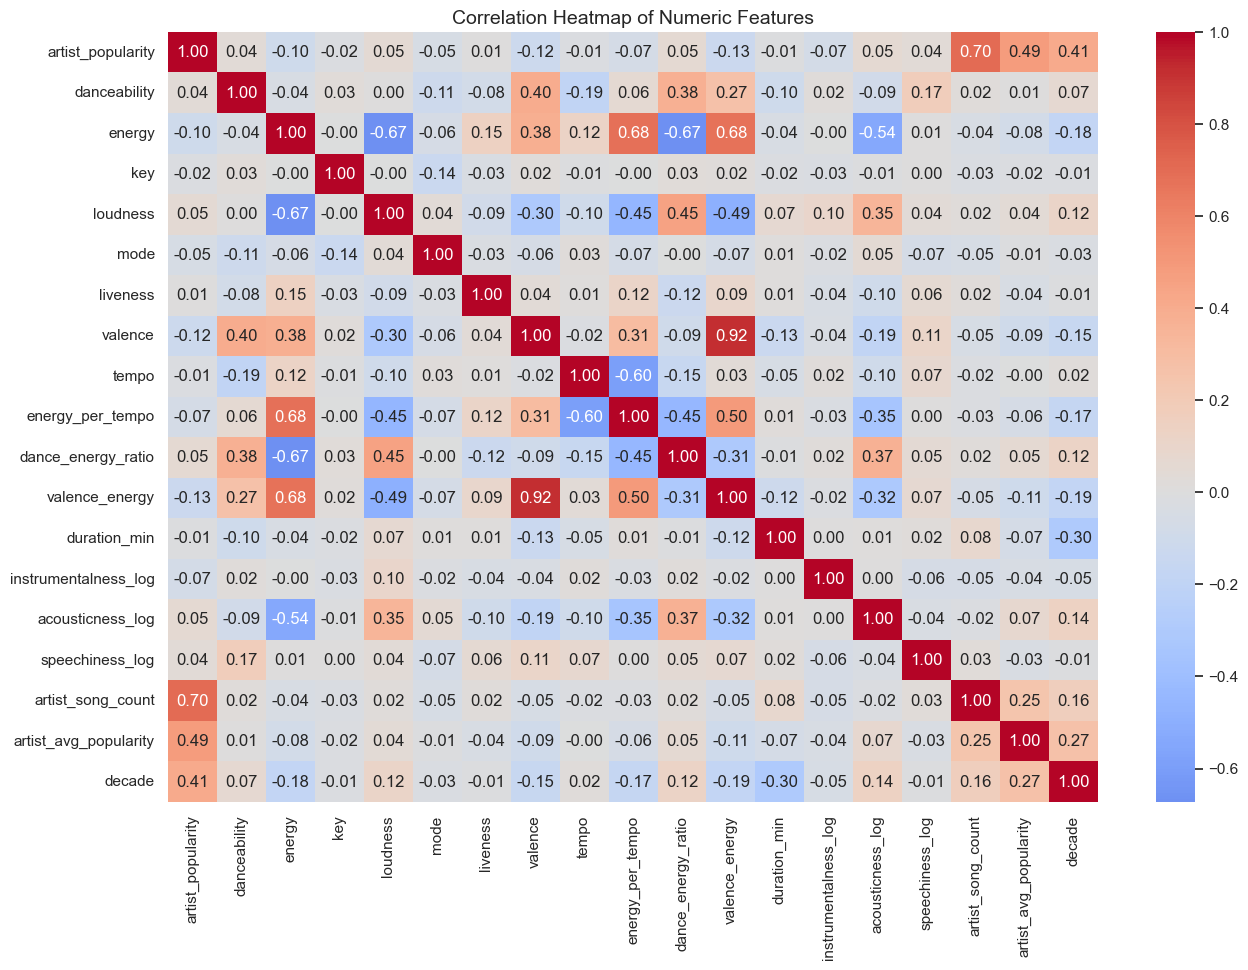

In [27]:
# Summary statistics
df_final.describe().T

# Correlation matrix
corr = df_final.select_dtypes(include=["float64", "int64"]).corr()

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">

The ABT for DT, RF,Boosting and NB is ready and now we will save a clean copy
</div>

In [28]:
# Export cleaned dataset to Excel
output_path = "spotify_clean_ABT.xlsx"
df_final.to_excel(output_path, index=False)